# Bias and Variance in Machine Learning

#### we have taken up the Pima Indians Diabetes dataset and formed a classification problem on it.

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

#### load the dataset

In [3]:
data_file_path="data set/diabetes.csv"
df=pd.read_csv(data_file_path)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
df.shape

(768, 9)

#### We need to predict the ‘Outcome’ column. Let us separate it and assign it to a target variable ‘y’. The rest of the data frame will be the set of input variables X.

In [15]:
y=df["Outcome"].values
x=df.drop(["Outcome"],axis=1)

In [16]:
x.shape

(768, 8)

In [17]:
y.shape

(768,)

### Split the data in to training and testing

In [25]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size = 0.3, random_state = 1) 

### Perform Feature Scaling

In [27]:
#Without scaling values
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


In [28]:
#with scaleing values
x_train=ss.fit_transform(x_train)

In [29]:
x_train

array([[ 3.3536084 ,  0.48047259,  0.05216975, ...,  0.68611992,
        -0.94690147,  0.81020454],
       [-1.12101735, -0.76891126, -0.2463932 , ...,  0.64699564,
         0.39612987, -0.69526203],
       [-0.82270897, -0.16023707,  0.05216975, ..., -0.5788985 ,
        -0.7936697 , -1.02981015],
       ...,
       [ 2.75699163,  0.16011776,  1.04737957, ...,  1.50772982,
         0.34505262,  0.72656751],
       [ 0.07221618,  1.60171451,  0.15169073, ...,  1.53381267,
         0.03258   , -0.611625  ],
       [ 1.5637581 , -0.60873384,  0.3507327 , ...,  0.13837998,
         0.59142526,  1.06111563]])

In [30]:
#without scaleing values
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27
352,3,61,82,28,0,34.4,0.243,46
726,1,116,78,29,180,36.1,0.496,25
...,...,...,...,...,...,...,...,...
241,4,91,70,32,88,33.1,0.446,22
599,1,109,38,18,120,23.1,0.407,26
650,1,91,54,25,100,25.2,0.234,23
11,10,168,74,0,0,38.0,0.537,34


In [31]:
#with scaleing values
x_test=ss.fit_transform(x_test)
x_test

array([[ 0.86995882,  0.45699241,  0.25980491, ..., -0.76151628,
         0.50921902,  1.59166794],
       [-0.89802201,  0.90342001, -0.54192131, ..., -0.74952349,
        -0.92230401, -0.98321338],
       [ 0.57529535, -0.34657727, -0.54192131, ..., -0.8814442 ,
        -0.83971614, -0.53926832],
       ...,
       [-0.89802201, -0.8822904 , -0.88551826, ..., -0.85745861,
        -0.75406946, -0.89442437],
       [ 1.75394924,  1.4093713 ,  0.25980491, ...,  0.67761866,
         0.17274993,  0.08225475],
       [ 1.45928577, -0.25729175,  0.71793418, ...,  0.2218926 ,
        -0.67454041,  0.25983278]])

### Since the outcomes are classified in a binary form, we will use the simplest K-nearest neighbor classifier(Knn) to classify whether the patient has diabetes or not.

### how do we decide the value of ‘k’?

##### * Maybe we should use k = 1 so that we will get very good results on our training data? That might work, but we cannot guarantee that the model will perform just as well on our testing data since it can get too specific
#####  *How about using a high value of k, say like k = 100 so that we can consider a large number of nearest points to account for the distant points as well? However, this kind of model will be too generic and we cannot be sure if it has considered all the possible contributing features correctly.
##### *Let us take a few possible values of k and fit the model on the training data for all those values. We will also compute the training score and testing score for all those values.

In [32]:
training_score=[]
test_score=[]
k_values=[]

for k in range(1,21):
    k_values.append(k)
    knn=KNeighborsClassifier(n_neighbors = k)
    
    knn.fit(x_train,y_train)
    tr_score=knn.score(x_train,y_train)
    training_score.append(tr_score)
    
    ts_score=knn.score(x_test,y_test)
    test_score.append(ts_score)

## To derive more insights from this, let us plot the training data(in red) and the testing data(in blue).

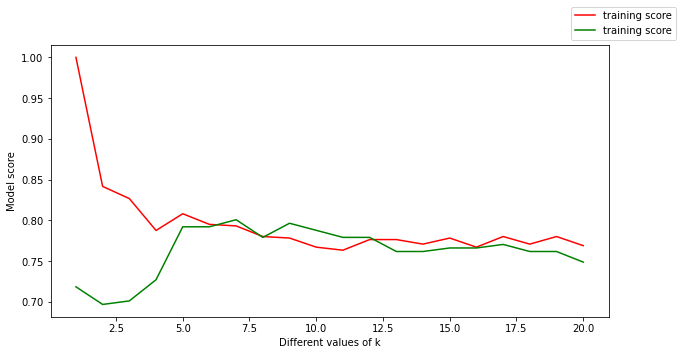

In [33]:
plt.figure(figsize=(10,5))
plt.plot(k_values,training_score, color="r",label="training score")
plt.plot(k_values,test_score, color="g",label="training score")
plt.xlabel("Different values of k")
plt.ylabel("Model score")
plt.legend(bbox_to_anchor=(1, 1),bbox_transform=plt.gcf().transFigure)
plt.show()

## We can make the following conclusions from the above plot:

### For low values of k, the training score is high, while the testing score is low
### As the value of k increases, the testing score starts to increase and the training score starts to decrease.
### However, at some value of k, both the training score and the testing score are close to each other.
### This is where Bias and Variance come into the picture
### thats why we select k values which the model score of both training and testing  close to each other selecting that k value is reduces the variance and bia in model
### In this case k=6 where training and testing score close to each other

In [35]:
knn = KNeighborsClassifier(n_neighbors = 6)

#Fit the model
knn.fit(x_train,y_train)

#get the score
knn.score(x_test,y_test)

0.7922077922077922

In [36]:
confusion_matrix(y_test,knn.predict(x_test))

array([[139,   7],
       [ 41,  44]], dtype=int64)

In [40]:
accuracy_score(y_test,knn.predict(x_test))

0.7922077922077922